In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision
import torch

In [2]:
anime=pd.read_csv("C:\\Users\\vj0805\\anime-recommendations\\anime.csv")
ratings=pd.read_csv("C:\\Users\\vj0805\\anime-recommendations\\rating.csv")

In [3]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
device

device(type='cuda', index=0)

In [4]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
ratings.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [6]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
anime_id    12294 non-null int64
name        12294 non-null object
genre       12232 non-null object
type        12269 non-null object
episodes    12294 non-null object
rating      12064 non-null float64
members     12294 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 672.4+ KB


In [7]:
k=anime[anime["rating"].isnull()]
k.head()

,anime_id,name,genre,type,episodes,rating,members
8968,34502,Inazma Delivery,"Action, Comedy, Sci-Fi",TV,10,NaN,32
9657,34309,Nananin no Ayakashi: Chimi Chimi Mouryou!! Gen...,"Comedy, Supernatural",TV,Unknown,NaN,129
10896,34096,Gintama (2017),"Action, Comedy, Historical, Parody, Samurai, S...",TV,Unknown,NaN,13383
10897,34134,One Punch Man 2,"Action, Comedy, Parody, Sci-Fi, Seinen, Super ...",TV,Unknown,NaN,90706
10898,30484,Steins;Gate 0,"Sci-Fi, Thriller",NaN,Unknown,NaN,60999


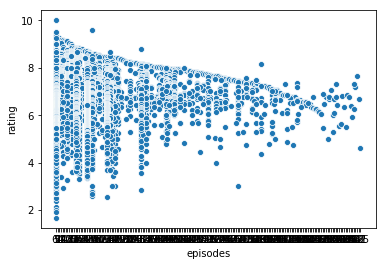

In [8]:
sns.scatterplot(x='episodes',y='rating',data=anime)

In [9]:
anime[anime["name"]=="Bakuman."]

,anime_id,name,genre,type,episodes,rating,members
184,7674,Bakuman.,"Comedy, Romance, Shounen",TV,25,8.35,246899


In [10]:
anime.drop(columns=['genre','type','episodes'],inplace=True)

In [11]:
anime.head()

,anime_id,name,rating,members
0,32281,Kimi no Na wa.,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,9.26,793665
2,28977,Gintama°,9.25,114262
3,9253,Steins;Gate,9.17,673572
4,9969,Gintama&#039;,9.16,151266


In [12]:
ratings = pd.merge(anime,ratings,on=['anime_id','anime_id'])
ratings.head()

,anime_id,name,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,9.37,200630,99,5
1,32281,Kimi no Na wa.,9.37,200630,152,10
2,32281,Kimi no Na wa.,9.37,200630,244,10
3,32281,Kimi no Na wa.,9.37,200630,271,10
4,32281,Kimi no Na wa.,9.37,200630,278,-1


In [13]:
ratings[ratings.user_id==200].head()

,anime_id,name,rating_x,members,user_id,rating_y
28210,9253,Steins;Gate,9.17,673572,200,10
89808,2904,Code Geass: Hangyaku no Lelouch R2,8.98,572888,200,10
118030,199,Sen to Chihiro no Kamikakushi,8.93,466254,200,10
159877,1575,Code Geass: Hangyaku no Lelouch,8.83,715151,200,10
227118,164,Mononoke Hime,8.81,339556,200,10


In [14]:
ratings.drop(columns=['members','rating_x'],inplace=True)
ratings.head()

,anime_id,name,user_id,rating_y
0,32281,Kimi no Na wa.,99,5
1,32281,Kimi no Na wa.,152,10
2,32281,Kimi no Na wa.,244,10
3,32281,Kimi no Na wa.,271,10
4,32281,Kimi no Na wa.,278,-1


In [15]:
ratings.sort_values(['user_id','anime_id'],ascending=[0,1],inplace=True)

In [16]:
ratings.head()

,anime_id,name,user_id,rating_y
2321291,790,Ergo Proxy,73516,9
4964988,8074,Highschool of the Dead,73516,9
213710,1,Cowboy Bebop,73515,10
982158,5,Cowboy Bebop: Tengoku no Tobira,73515,10
1324316,6,Trigun,73515,10


In [17]:
ratings = ratings[ratings.user_id <= 10000]
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1042697 entries, 5487482 to 7418121
Data columns (total 4 columns):
anime_id    1042697 non-null int64
name        1042697 non-null object
user_id     1042697 non-null int64
rating_y    1042697 non-null int64
dtypes: int64(3), object(1)
memory usage: 39.8+ MB


In [18]:
print(max(ratings.user_id),max(ratings.anime_id))

10000 34325


In [19]:
ratings[ratings["name"]=="Bakuman."].head()

,anime_id,name,user_id,rating_y
1158128,7674,Bakuman.,9995,8
1158127,7674,Bakuman.,9988,8
1158126,7674,Bakuman.,9985,10
1158125,7674,Bakuman.,9980,8
1158124,7674,Bakuman.,9966,10


In [20]:
AnimePerUser=ratings.user_id.value_counts()
UserPerAnime=ratings.name.value_counts()
UserPerAnime.head()

Death Note                         5395
Shingeki no Kyojin                 4301
Sword Art Online                   4214
Code Geass: Hangyaku no Lelouch    3818
Elfen Lied                         3728
Name: name, dtype: int64

In [21]:
def favAnime(user,N):
    topAnime=pd.DataFrame.sort_values(ratings[ratings.user_id==user],['rating_y'],ascending=False)[:N]
    return list(topAnime.name)

print(favAnime(100,10))

['Gakkou no Kaidan', 'Durarara!!', 'Ao no Exorcist', 'Sword Art Online', 'Highschool of the Dead']


In [22]:
useritemmatrix=ratings.pivot_table(index=["user_id"],columns=["anime_id"],values='rating_y')
useritemmatrix.shape

(10000, 8337)

In [32]:
useritemmatrix.head()

anime_id,1,5,6,7,8,15,16,17,18,19,...,34048,34085,34103,34107,34136,34173,34240,34283,34324,34325
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,8.0,NaN,NaN,6.0,NaN,6.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
UIM=torch.Tensor(useritemmatrix.values)

In [ ]:
UIM

In [ ]:
useritemmatrix.head()

In [ ]:
myRatings=useritemmatrix.loc[50].dropna()
x=anime.loc[anime.anime_id.isin(myRatings.index)]
x.head()

In [33]:
def matrixfact(R,K,steps=10,gamma=0.001,lamda=0.02):
    
    N=len(R.index)
    M=len(R.columns)
    P=pd.DataFrame(np.random.rand(N,K),index=R.index)
    
    Q=pd.DataFrame(np.random.rand(M,K),index=R.columns)
    
    for step in range(steps):
        for i in R.index:
            for j in R.columns:
                if R.loc[i,j]>0:
                    eij=R.loc[i,j]-np.dot(P.loc[i],Q.loc[j])
                    
                    P.loc[i]=P.loc[i]+gamma*(eij*Q.loc[j]-lamda*P.loc[i])
                    Q.loc[j]=Q.loc[j]+gamma*(eij*P.loc[i]-lamda*Q.loc[j])
        e=0            
        for i in R.index:
            for j in R.columns:
                if R.loc[i,j]>0:
                    e=e+pow(R.loc[i,j]-np.dot(P.loc[i],Q.loc[j]),2)+lamda*(pow(np.linalg.norm(P.loc[i]),2)+pow(np.linalg.norm(Q.loc[j]),2))
                    
        if e<0.001:
            break
        print(step,e)
    return P,Q

(P,Q)=matrixfact(useritemmatrix.iloc[:200,:200],K=3,steps=100,gamma=0.001,lamda=0.02)

0 47723.29950607548
1 44557.10698229897
2 41157.196474242475
3 37611.39815041055
4 34036.9041058222
5 30563.26175850266
6 27309.93921987307
7 24365.774956045036
8 21777.504961785748
9 19550.34320797727
10 17658.086861530155
11 16057.032984079364
12 14698.416231255713
13 13536.661313108832
14 12533.303969506
15 11657.802597704027
16 10886.684108202273
17 10202.10098288266
18 9590.40245915615
19 9040.966013373365
20 8545.333275639687
21 8096.607072126778
22 7689.043348211413
23 7317.777387008073
24 6978.6381424574965
25 6668.018772031951
26 6382.782640313054
27 6120.191886644707
28 5877.850745685369
29 5653.658967601224
30 5445.772567855053
31 5252.570225116707
32 5072.624259610353
33 4904.675464770437
34 4747.611253991542
35 4600.446692124062
36 4462.30804761488
37 4332.4185469077365
38 4210.086048582675
39 4094.692385744698
40 3985.6841534619457
41 3882.564744291208
42 3784.8874592168786
43 3692.249543578063
44 3604.287017680106
45 3520.6701897525663
46 3441.099754773845
47 3365.303396

In [36]:
activeuser=55
predictions=pd.DataFrame(np.dot(P.loc[activeuser],Q.T),index=Q.index,columns=["Ratings"])
toprec=pd.DataFrame.sort_values(predictions,["Ratings"],ascending=False)

toprec=anime.loc[anime.anime_id.isin(toprec.index)]

toprec[:10]

,anime_id,name,rating,members
15,199,Sen to Chihiro no Kamikakushi,8.93,466254
21,44,Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...,8.83,129307
22,1,Cowboy Bebop,8.82,486824
24,164,Mononoke Hime,8.81,339556
38,19,Monster,8.72,247562
79,170,Slam Dunk,8.56,82570
104,205,Samurai Champloo,8.50,390076
112,136,Hunter x Hunter,8.48,166255
130,32,Neon Genesis Evangelion: The End of Evangelion,8.45,215630
135,45,Rurouni Kenshin: Meiji Kenkaku Romantan,8.43,218928


In [37]:
toprec["anime_id"].sort_values()

22         1
152        5
214        6
2095       7
3159       8
433       15
325       16
976       17
263       18
38        19
841       20
482       22
4536      23
464       24
1432      25
906       26
1805      27
475       28
1400      29
211       30
1538      31
130       32
151       33
191       43
21        44
135       45
1174      46
358       47
2865      48
1885      49
        ... 
1090     194
2121     195
3216     196
4654     197
1729     198
15       199
1302     200
2284     201
641      202
11276    203
6130     204
104      205
2486     206
1422     207
899      208
1192     209
733      210
11611    211
3344     212
11731    213
11588    214
5222     215
6452     216
11517    217
1286     218
3736     219
11811    220
11362    221
4207     222
346      223
Name: anime_id, Length: 200, dtype: int64

In [ ]:
def matrixfact(R,K,steps=10,gamma=0.001,lamda=0.02):
    
    N = R.shape[0]
    M = R.shape[1]
    R=R.to(device)
    P=torch.randn(N,K).to(device)
    
    Q=torch.randn(M,K).to(device)
    
    for step in range(steps):
        for i in range(1,R.shape[0]):
            for j in range(1,R.shape[1]):
                if R[i,j]>0:
                    eij=R[i,j]-P[i].dot(Q[j])
                    
                    P[i]=P[i]+gamma*(eij*Q[j]-lamda*P[i])
                    Q[j]=Q[j]+gamma*(eij*P[i]-lamda*Q[j])
        e=0            
        for i in range(1,R.shape[0]):
            for j in range(1,R.shape[1]):
                if R[i,j]>0:
                    e=e+pow(R[i,j]-P[i].dot(Q[j]),2)+lamda*(pow(np.linalg.norm(P[i]),2)+pow(np.linalg.norm(Q[j]),2))
                    
        if e<0.001:
            break
        print(step,e)
    return P,Q

(P,Q)=matrixfact(UIM[:200,:200],K=3,steps=10,gamma=0.001,lamda=0.02)